In [8]:
import numpy as np
import pandas as pd
from keras.layers import Dense,Dropout
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from keras.models import Sequential
import matplotlib.pyplot as plt
import math
import csv
import numpy as np

In [9]:

u=[]
z=[]
t1=np.arange(0,180.1,1)
t2=np.arange(0,180.1,1)
for i in t1:

  for j in t2:
    x=50*math.cos(math.radians(i))+40*math.cos(math.radians(i+j))
    y=50*math.sin(math.radians(i))+40*math.sin(math.radians(i+j))
    
    z.append(np.array((i,j,x,y)))
  u.extend(z)

In [4]:
header = ['anpha', 'beta', 'x', 'y']
with open('robot_2b.csv', 'w', encoding='UTF8', newline='') as f:
    writer = csv.writer(f)

    # write the header
    writer.writerow(header)

    # write multiple rows
    writer.writerows(u)


In [5]:
import pandas as pd
data = pd.read_csv('robot_2b.csv')
data.shape
numpy_dataset = data.values
y=numpy_dataset[:,:2]/180.0
x=(numpy_dataset[:,2:]+90)/180.0
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20)

In [6]:
print("Shape of data is: ",x_train.shape)
print("Shape of data is: ",y_train.shape)

Shape of data is:  (2385000, 2)
Shape of data is:  (2385000, 2)


In [10]:
#tao model
model = Sequential() 
model.add(Dense(32, activation='relu', input_shape = (2,))) 
model.add(Dense(64, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(2))
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 32)                96        
                                                                 
 dense_5 (Dense)             (None, 64)                2112      
                                                                 
 dense_6 (Dense)             (None, 512)               33280     
                                                                 
 dense_7 (Dense)             (None, 2)                 1026      
                                                                 
Total params: 36,514
Trainable params: 36,514
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.compile(loss='mae', optimizer =Adam(), metrics=['acc'])
history = model.fit(x_train, y_train, batch_size = 32, epochs = 10, validation_split = 0.2)

Epoch 1/10
59625/59625 [==============================] - 174s 3ms/step - loss: 0.0068 - acc: 0.9852 - val_loss: 0.0040 - val_acc: 0.9937
Epoch 2/10
59625/59625 [==============================] - 166s 3ms/step - loss: 0.0053 - acc: 0.9883 - val_loss: 0.0065 - val_acc: 0.9846
Epoch 3/10
59625/59625 [==============================] - 161s 3ms/step - loss: 0.0047 - acc: 0.9893 - val_loss: 0.0070 - val_acc: 0.9776
Epoch 4/10
59625/59625 [==============================] - 155s 3ms/step - loss: 0.0044 - acc: 0.9902 - val_loss: 0.0029 - val_acc: 0.9923
Epoch 5/10
59625/59625 [==============================] - 157s 3ms/step - loss: 0.0041 - acc: 0.9906 - val_loss: 0.0037 - val_acc: 0.9938
Epoch 6/10
59625/59625 [==============================] - 163s 3ms/step - loss: 0.0040 - acc: 0.9910 - val_loss: 0.0040 - val_acc: 0.9912
Epoch 7/10
59625/59625 [==============================] - 159s 3ms/step - loss: 0.0038 - acc: 0.9912 - val_loss: 0.0032 - val_acc: 0.9911
Epoch 8/10
59625/59625 [==========

In [ ]:
model.save('Robot2bac.h5')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Unrecognized location 'upper_left'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  


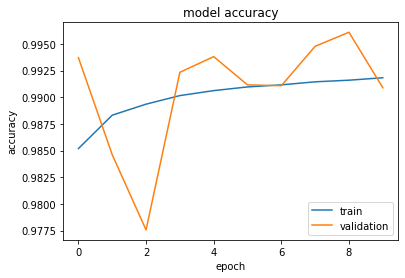

In [13]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='upper_left')
plt.show()

In [14]:
Px_test_train = (40)/180.0
Py_test_train = (50)/180.0
print(Px_test_train,Py_test_train)
test = model.predict([[Px_test_train,Py_test_train]])
t1 = test[0][0]*180
t2 = test[0][1]*180
x_1=50*math.cos(math.radians(t1))+40*math.cos(math.radians(t1+t2))
y_1=50*math.sin(math.radians(t1))+40*math.sin(math.radians(t1+t2))
print('x = ',x_1,'y = ',y_1)
print(t1,t2)

0.2222222222222222 0.2777777777777778
x =  -49.747996605147726 y =  -41.48636241187012
181.70425415039062 88.6250352859497
